In [1]:
# from tensorflow.compat.v1 import ConfigProto
# from tensorflow.compat.v1 import InteractiveSession

# config = ConfigProto()
# config.gpu_options.per_process_gpu_memory_fraction = 0.5
# config.gpu_options.allow_growth = True
# session = InteractiveSession(config=config)

In [2]:
# import the libraries

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt


In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = "D:/Data science/SBSI/garbage_classification"

In [4]:
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
#

In [5]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [6]:
  # useful for getting number of output classes
folders = glob('D:/Data science/SBSI/garbage_classification/*')

In [8]:
folders

['D:/Data science/SBSI/garbage_classification\\battery',
 'D:/Data science/SBSI/garbage_classification\\biological',
 'D:/Data science/SBSI/garbage_classification\\brown-glass',
 'D:/Data science/SBSI/garbage_classification\\cardboard',
 'D:/Data science/SBSI/garbage_classification\\clothes',
 'D:/Data science/SBSI/garbage_classification\\green-glass',
 'D:/Data science/SBSI/garbage_classification\\metal',
 'D:/Data science/SBSI/garbage_classification\\paper',
 'D:/Data science/SBSI/garbage_classification\\plastic',
 'D:/Data science/SBSI/garbage_classification\\shoes',
 'D:/Data science/SBSI/garbage_classification\\TransferLearning.ipynb',
 'D:/Data science/SBSI/garbage_classification\\trash',
 'D:/Data science/SBSI/garbage_classification\\tryingmodel.h5',
 'D:/Data science/SBSI/garbage_classification\\trymodel.tflite',
 'D:/Data science/SBSI/garbage_classification\\white-glass']

In [7]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [9]:
# view the structure of the model
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [10]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [11]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [12]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('D:/Data science/SBSI/garbage_classification',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 15515 images belonging to 13 classes.


In [16]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  epochs=10,
  steps_per_epoch=len(training_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
485/485 [==============================] - 459s 947ms/step - loss: 2.5998 - accuracy: 0.8246
Epoch 2/10
485/485 [==============================] - 374s 770ms/step - loss: 1.7305 - accuracy: 0.8942
Epoch 3/10
485/485 [==============================] - 372s 766ms/step - loss: 1.5610 - accuracy: 0.9161
Epoch 4/10
485/485 [==============================] - 555s 1s/step - loss: 1.4275 - accuracy: 0.9265
Epoch 5/10
485/485 [==============================] - 412s 850ms/step - loss: 1.2476 - accuracy: 0.9353
Epoch 6/10
485/485 [==============================] - 358s 737ms/step - loss: 1.0759 - accuracy: 0.9456
Epoch 7/10
485/485 [==============================] - 432s 891ms/step - loss: 1.1987 - accuracy: 0.9443
Epoch 8/10
485/485 [==============================] - 443s 914ms/step - loss: 1.0278 - accuracy: 0.9518
Epoch 9/10
485/485 [==============================] - 442s 912ms/step - loss: 1.0053 - accuracy

In [17]:
model.save("tryingmodel.h5")

In [18]:
import matplotlib.pyplot as plt

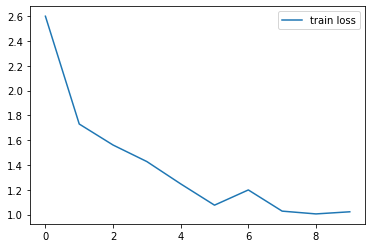

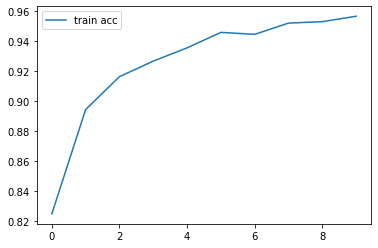

In [19]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.legend()
plt.show()

In [20]:
import tensorflow as tf

 #Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('trymodel.tflite', 'wb') as f:
  f.write(tflite_model)


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: C:\Users\ankit\AppData\Local\Temp\tmp131o6q_a\assets
